# 설정

In [314]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [315]:
import warnings
warnings.filterwarnings(action='ignore')

In [316]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

In [317]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 데이터 다운

In [318]:
housing = pd.read_csv("data/housing.csv")

# 데이터 구조

In [319]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [320]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [321]:
housing["date"].value_counts()

date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: count, Length: 372, dtype: int64

In [322]:
housing['date'] = pd.to_datetime(housing['date'], format='%Y%m%dT%H%M%S')

housing['date_year'] = housing['date'].dt.strftime('%Y')

housing_2014 = housing[housing['date_year'] == '2014']

housing["date_year"].value_counts()

date_year
2014    14633
2015     6980
Name: count, dtype: int64

In [323]:
housing.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21600.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.401822e+05,3.370926,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.673622e+05,0.930178,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


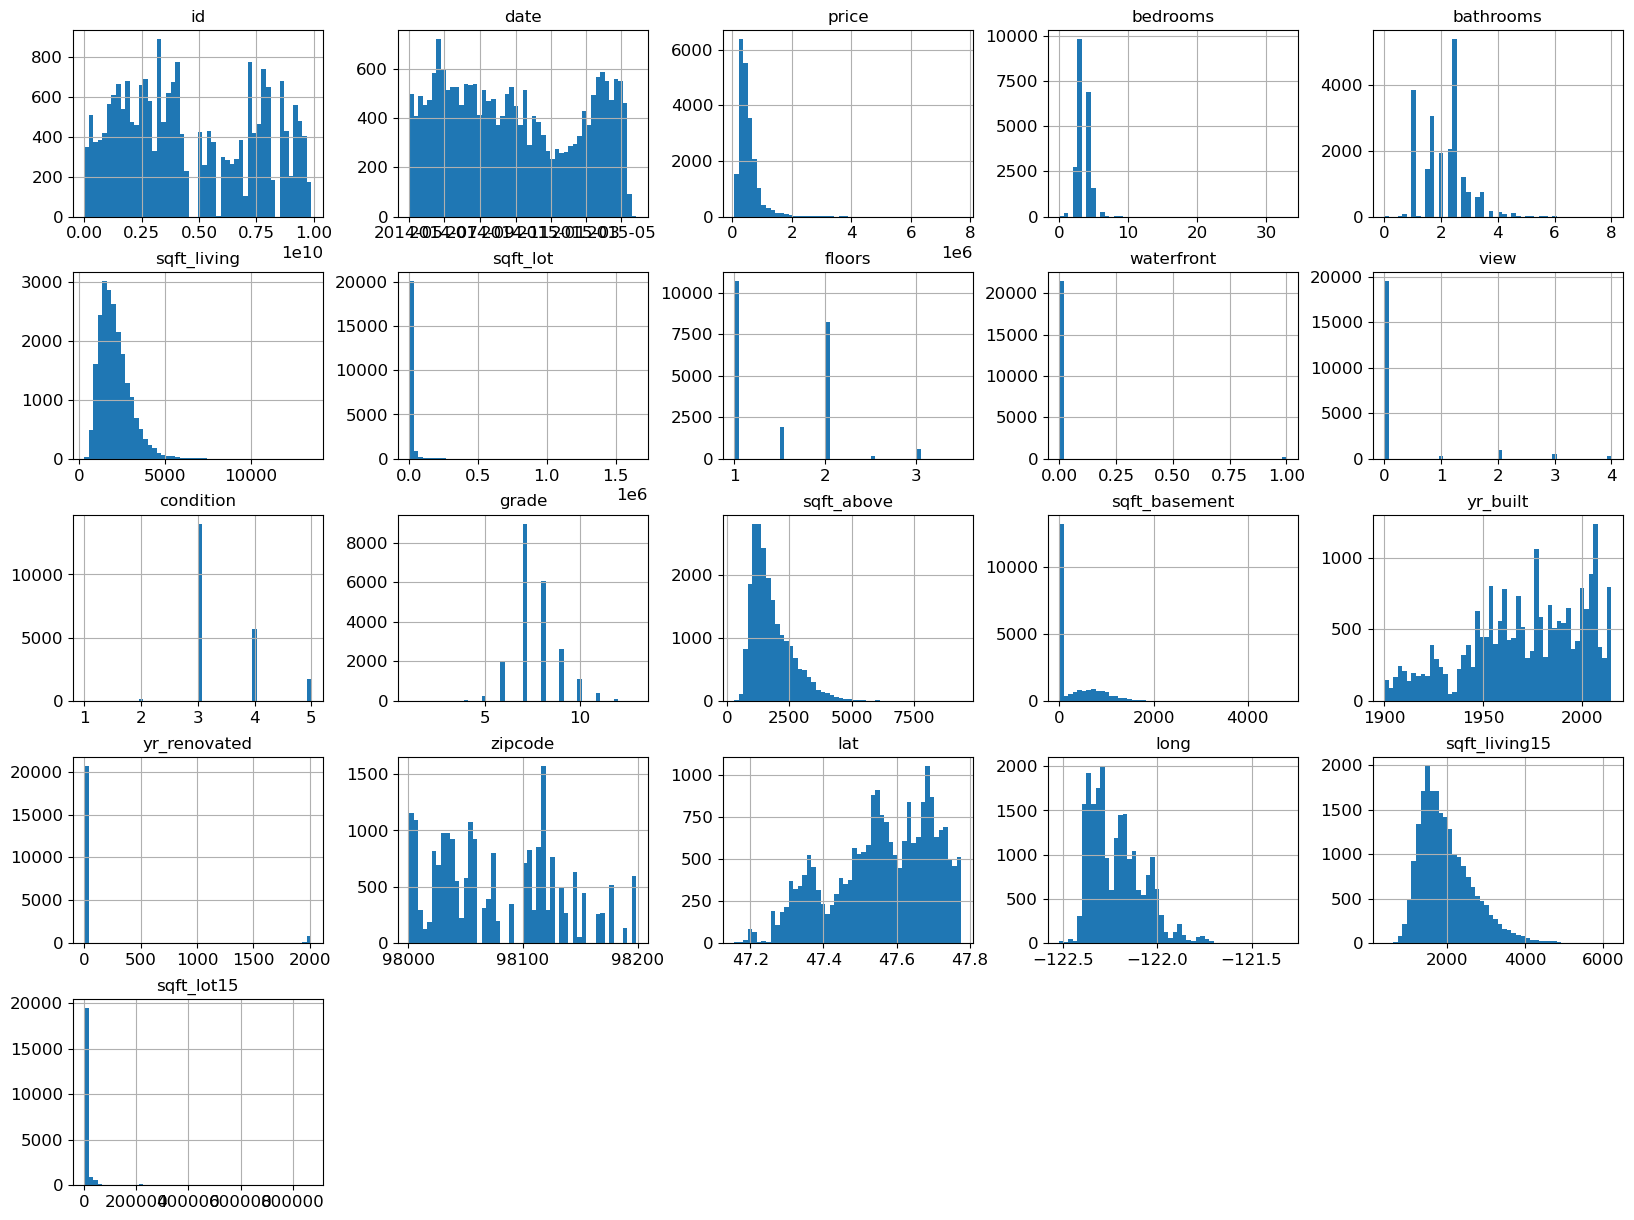

In [324]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# 테스트셋 만들기

In [325]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [326]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

17291

In [327]:
len(test_set)

4322

In [328]:
np.random.seed(42)

In [329]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [330]:
test_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year
735,2591820310,2014-10-06,365000,4.0,2.25,2070,8893,2.0,0,0,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014
2830,7974200820,2014-08-21,865000,5.0,3.00,2900,6730,1.0,0,0,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014
4106,7701450110,2014-08-15,1040000,4.0,2.50,3770,10893,2.0,0,2,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014
16218,9522300010,2015-03-31,1490000,3.0,3.50,4560,14608,2.0,0,2,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015
19964,9510861140,2014-07-14,711000,3.0,2.50,2550,5376,2.0,0,0,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014


<Axes: >

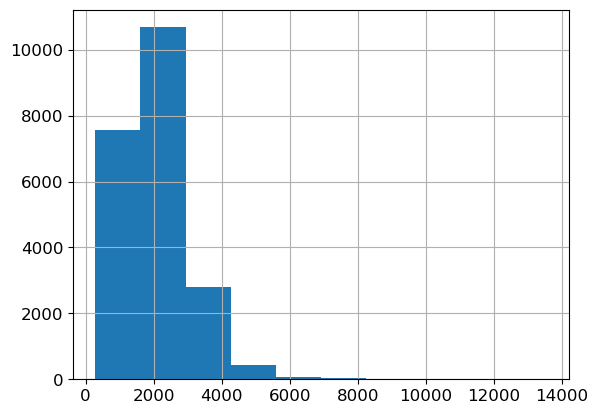

In [331]:
housing["sqft_living"].hist()

In [332]:
housing["sqft_living_cat"] = pd.cut(housing["sqft_living"],
                               bins=[0, 1000, 2000, 3000, 4000, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [333]:
housing["sqft_living_cat"].value_counts()

sqft_living_cat
2    10218
3     6819
4     2299
1     1494
5      783
Name: count, dtype: int64

<Axes: >

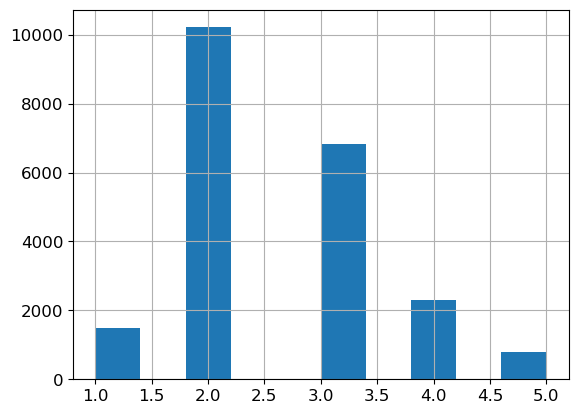

In [334]:
housing["sqft_living_cat"].hist()

In [335]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["sqft_living_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [336]:
strat_test_set["sqft_living_cat"].value_counts() / len(strat_test_set)

sqft_living_cat
2    0.472820
3    0.315522
4    0.106408
1    0.069165
5    0.036086
Name: count, dtype: float64

In [337]:
housing["sqft_living_cat"].value_counts() / len(housing)

sqft_living_cat
2    0.472771
3    0.315505
4    0.106371
1    0.069125
5    0.036228
Name: count, dtype: float64

In [338]:
def income_cat_proportions(data):
    return data["sqft_living_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [339]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
sqft_living_cat,,,,,
1,0.069125,0.069165,0.065232,-5.631223,0.057675
2,0.472771,0.472820,0.470044,-0.576826,0.010319
3,0.315505,0.315522,0.318297,0.885224,0.005411
4,0.106371,0.106408,0.105020,-1.270554,0.034240
5,0.036228,0.036086,0.041406,14.293383,-0.392359


In [340]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("sqft_living_cat", axis=1, inplace=True)
    
housing = strat_train_set.copy()

# 상관관계

In [341]:
corr_matrix = housing.corr()

In [342]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701768
grade            0.674241
sqft_above       0.605112
sqft_living15    0.589177
bathrooms        0.524402
view             0.391527
sqft_basement    0.320250
bedrooms         0.308353
lat              0.307949
waterfront       0.260091
floors           0.259653
yr_renovated     0.113940
sqft_lot         0.091328
sqft_lot15       0.088731
yr_built         0.060352
condition        0.037358
long             0.024959
date_year       -0.001038
date            -0.007055
id              -0.012470
zipcode         -0.058291
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='grade', ylabel='price'>,
        <Axes: xlabel='sqft_above', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living'>,
        <Axes: xlabel='grade', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_above', ylabel='sqft_living'>],
       [<Axes: xlabel='price', ylabel='grade'>,
        <Axes: xlabel='sqft_living', ylabel='grade'>,
        <Axes: xlabel='grade', ylabel='grade'>,
        <Axes: xlabel='sqft_above', ylabel='grade'>],
       [<Axes: xlabel='price', ylabel='sqft_above'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_above'>,
        <Axes: xlabel='grade', ylabel='sqft_above'>,
        <Axes: xlabel='sqft_above', ylabel='sqft_above'>]], dtype=object)

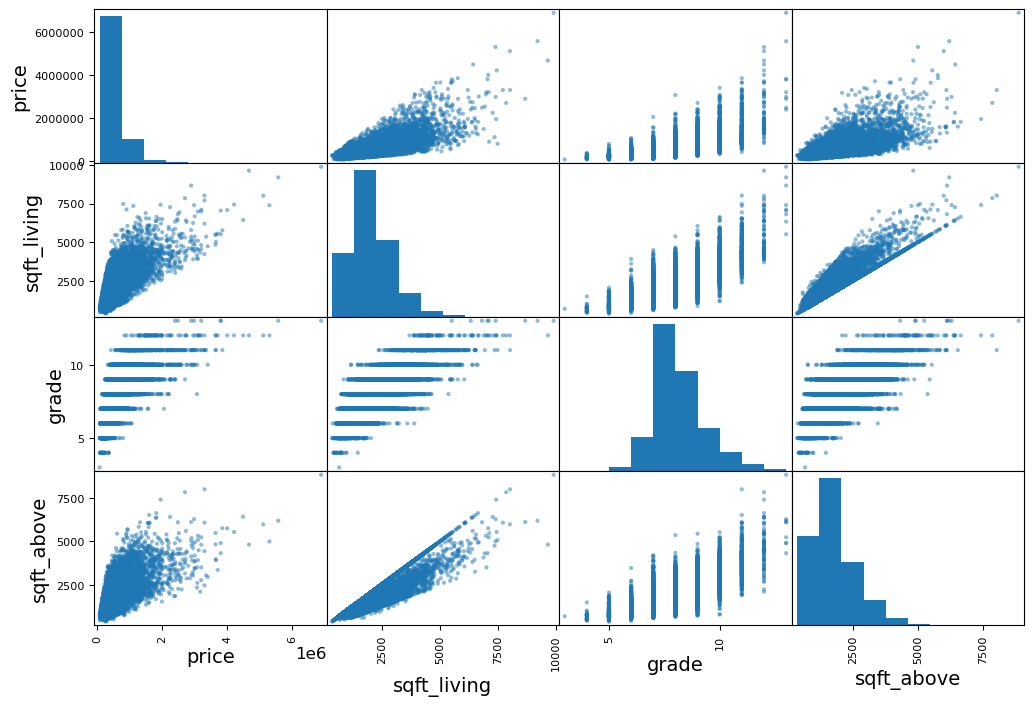

In [343]:
from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "grade",
              "sqft_above"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='sqft_living', ylabel='price'>

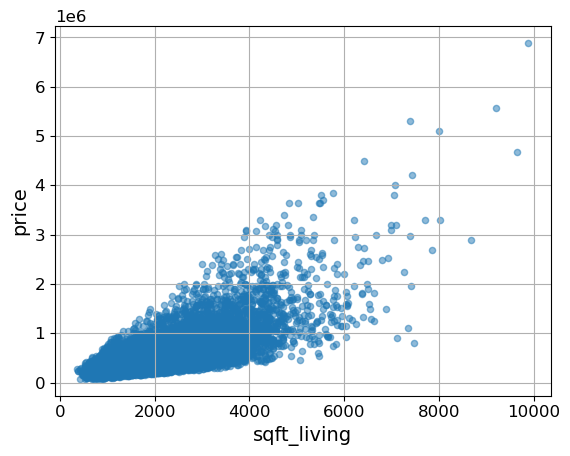

In [344]:
housing.plot(kind="scatter", x="sqft_living", y="price",
             alpha=0.5, grid=True)

# 특성조합

In [345]:
housing["bed_bath"] =  housing["bedrooms"] + housing["bathrooms"]
housing["living_basement"] = housing["sqft_living"] + housing["sqft_basement"]

In [346]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
sqft_living        0.701768
grade              0.674241
living_basement    0.666450
sqft_above         0.605112
sqft_living15      0.589177
bathrooms          0.524402
bed_bath           0.466187
view               0.391527
sqft_basement      0.320250
bedrooms           0.308353
lat                0.307949
waterfront         0.260091
floors             0.259653
yr_renovated       0.113940
sqft_lot           0.091328
sqft_lot15         0.088731
yr_built           0.060352
condition          0.037358
long               0.024959
date_year         -0.001038
date              -0.007055
id                -0.012470
zipcode           -0.058291
Name: price, dtype: float64

In [347]:
housing.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,living_basement
count,1.729000e+04,17290,1.729000e+04,17278.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17278.000000,17290.000000
mean,4.592511e+09,2014-10-29 04:21:25.922498304,5.394920e+05,3.373481,2.114951,2079.757490,1.496055e+04,1.493233,0.007866,0.232851,...,292.627068,1971.044303,85.507230,98077.947137,47.560199,-122.214212,1983.979757,12647.374031,5.488410,2372.384558
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,370.000000
25%,2.124054e+09,2014-07-22 00:00:00,3.215000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.470400,-122.329000,1480.000000,5100.000000,4.500000,1500.000000
50%,3.904990e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.610000e+03,1.500000,0.000000,0.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571450,-122.231000,1840.000000,7620.000000,5.500000,2170.000000
75%,7.312400e+09,2015-02-17 00:00:00,6.438375e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.000000,0.000000,0.000000,...,570.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10118.000000,6.500000,2987.500000
max,9.900000e+09,2015-05-27 00:00:00,6.890000e+06,33.000000,7.750000,9890.000000,1.651359e+06,3.500000,1.000000,4.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,34.750000,14460.000000
std,2.878747e+09,NaN,3.615735e+05,0.936761,0.767941,912.843744,4.165878e+04,0.539343,0.088343,0.763130,...,442.167222,29.390492,404.116406,53.598741,0.138340,0.140878,684.765243,26603.536039,1.483559,1173.694434


# 머신러닝 알고리즘을 위한 데이터 준비

In [348]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

# 데이터 정제

In [232]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [233]:
housing_num = housing.drop("date", axis=1)

In [234]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [235]:
imputer.statistics_

array([ 3.90499034e+09,  3.00000000e+00,  2.25000000e+00,  1.91000000e+03,
        7.61000000e+03,  1.50000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.00000000e+00,  7.00000000e+00,  1.56000000e+03,  0.00000000e+00,
        1.97500000e+03,  0.00000000e+00,  9.80650000e+04,  4.75714500e+01,
       -1.22231000e+02,  1.84000000e+03,  7.62000000e+03,  2.01400000e+03])

In [236]:
X = imputer.transform(housing_num)

In [237]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [238]:
housing_tr.loc[sample_incomplete_rows.index.values]

NameError: name 'sample_incomplete_rows' is not defined

In [239]:
imputer.strategy

'median'

In [240]:
housing_tr.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year
20474,9.930003e+08,3.0,3.25,1380.0,1234.0,3.0,0.0,0.0,3.0,8.0,1380.0,0.0,2006.0,0.0,98103.0,47.6935,-122.342,1370.0,1282.0,2014.0
3840,5.220590e+08,2.0,1.00,820.0,10450.0,1.0,0.0,0.0,4.0,7.0,820.0,0.0,1965.0,0.0,98055.0,47.4261,-122.199,1240.0,11200.0,2014.0
7426,2.524000e+09,3.0,3.50,4240.0,21578.0,2.0,0.0,0.0,3.0,10.0,3500.0,740.0,1994.0,0.0,98040.0,47.5614,-122.215,3120.0,16440.0,2014.0
4038,3.277801e+09,4.0,1.00,1140.0,6250.0,1.5,0.0,0.0,3.0,6.0,1140.0,0.0,1958.0,0.0,98126.0,47.5433,-122.375,1140.0,1370.0,2015.0
11420,7.202290e+09,3.0,2.50,1600.0,3172.0,2.0,0.0,0.0,3.0,7.0,1600.0,0.0,2002.0,0.0,98053.0,47.6868,-122.042,1690.0,3698.0,2014.0


# 텍스트 범주형 특성

In [241]:
housing_cat = housing[["date_year"]]
housing_cat.head(10)

,date_year
20474,2014
3840,2014
7426,2014
4038,2015
11420,2014
12116,2014
14161,2014
21429,2014
17076,2015
1345,2014


In [242]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<17290x2 sparse matrix of type '<class 'numpy.float64'>'
	with 17290 stored elements in Compressed Sparse Row format>

In [243]:
housing_cat_1hot.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [244]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [245]:
cat_encoder.categories_

[array(['2014', '2015'], dtype=object)]

# 변환기

In [246]:
from sklearn.base import BaseEstimator, TransformerMixin

bedrooms_ix, bathrooms_ix, sqft_living_ix, sqft_basement_ix = 3, 4, 5, 13

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_living_basement=True):
        self.add_living_basement = add_living_basement
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        bed_bath = X[:, bedrooms_ix] + X[:, bathrooms_ix]
        if self.add_living_basement:
            living_basement = X[:, sqft_living_ix] + X[:, sqft_basement_ix]
            return np.c_[X, bed_bath, 
                         living_basement]
        else:
            return np.c_[X, bed_bath]

attr_adder = CombinedAttributesAdder(add_living_basement=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [247]:
col_names = "bedrooms", "bathrooms", "sqft_living", "sqft_basement"
bedrooms_ix, bathrooms_ix, sqft_living_ix, sqft_basement_ix = [
    housing.columns.get_loc(c) for c in col_names]

In [248]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["bed_bath"],
    index=housing.index)
housing_extra_attribs.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,bed_bath
20474,993000315,2014-10-02,3.0,3.25,1380,1234,3.0,0,0,3,...,0,2006,0,98103,47.6935,-122.342,1370,1282,2014,1383.25
3840,522059013,2014-06-12,2.0,1.0,820,10450,1.0,0,0,4,...,0,1965,0,98055,47.4261,-122.199,1240,11200,2014,821.0
7426,2524000050,2014-12-12,3.0,3.5,4240,21578,2.0,0,0,3,...,740,1994,0,98040,47.5614,-122.215,3120,16440,2014,4243.5
4038,3277801450,2015-04-15,4.0,1.0,1140,6250,1.5,0,0,3,...,0,1958,0,98126,47.5433,-122.375,1140,1370,2015,1141.0
11420,7202290320,2014-10-24,3.0,2.5,1600,3172,2.0,0,0,3,...,0,2002,0,98053,47.6868,-122.042,1690,3698,2014,1602.5


# 파이프라인

In [249]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [250]:
housing_num_tr

array([[-1.25041026, -0.39854495,  1.47808418, ..., -0.69112335,
        -0.76486199, -0.32865802],
       [-1.41400744, -1.46639589, -1.45191173, ..., -0.69112335,
        -1.38042145, -0.10841793],
       [-0.71856641, -0.39854495,  1.80363928, ..., -0.69112335,
         2.36658123,  0.15939882],
       ...,
       [ 0.14172853, -1.46639589, -1.45191173, ..., -0.69112335,
        -0.83301419, -0.14699295],
       [-0.58110615, -0.39854495, -1.45191173, ..., -0.69112335,
        -1.0300808 , -0.25030775],
       [-0.69216179, -0.39854495,  0.17586377, ...,  1.44691972,
         1.41272408, -0.07668415]])

In [251]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["date_year"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [252]:
housing_prepared

array([[-1.25041026, -0.39854495,  1.47808418, ..., -0.32865802,
         1.        ,  0.        ],
       [-1.41400744, -1.46639589, -1.45191173, ..., -0.10841793,
         1.        ,  0.        ],
       [-0.71856641, -0.39854495,  1.80363928, ...,  0.15939882,
         1.        ,  0.        ],
       ...,
       [ 0.14172853, -1.46639589, -1.45191173, ..., -0.14699295,
         1.        ,  0.        ],
       [-0.58110615, -0.39854495, -1.45191173, ..., -0.25030775,
         1.        ,  0.        ],
       [-0.69216179, -0.39854495,  0.17586377, ..., -0.07668415,
         0.        ,  1.        ]])

In [253]:
housing_prepared.shape

(17290, 24)

# 모델 선택과 훈련

In [273]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [274]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [ 489619.3462737   182622.486864   1158250.60464151  160618.08752826
  360509.89976217]


In [275]:
print("레이블:", list(some_labels))

레이블: [379000.0, 173000.0, 1390000.0, 390000.0, 440500.0]


In [276]:
some_data_prepared

array([[-1.25041026, -0.39854495,  1.47808418, -0.76659092, -0.32950901,
         2.79379002, -0.08904033, -0.3051357 , -0.62893008,  0.29017316,
        -0.49372064, -0.66182095,  1.18938831, -0.21159671,  0.46742866,
         0.96360306, -0.90710479, -0.89665403, -0.42722526, -0.69112335,
        -0.76486199, -0.32865802,  1.        ,  0.        ],
       [-1.41400744, -1.46639589, -1.45191173, -1.3800762 , -0.10827675,
        -0.91453406, -0.08904033, -0.3051357 ,  0.90979938, -0.55716579,
        -1.17282381, -0.66182095, -0.20566099, -0.21159671, -0.42814067,
        -0.96936641,  0.10798604, -1.0865056 , -0.0544069 , -0.69112335,
        -1.38042145, -0.10841793,  1.        ,  0.        ],
       [-0.71856641, -0.39854495,  1.80363928,  2.36656602,  0.15885352,
         0.93962798, -0.08904033, -0.3051357 , -0.62893008,  1.98485107,
         2.07716993,  1.01180243,  0.7810812 , -0.21159671, -0.70800608,
         0.00868433, -0.00559056,  1.65904024,  0.1425651 , -0.69112335,
  

In [277]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

197057.60345799619

In [278]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

124890.87415850833

In [279]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

lin_reg.score(housing_prepared, housing_labels)

0.702957648144233

In [260]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [261]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

tree_reg.score(housing_prepared, housing_labels)

0.9998978478995215

# 교차 검증

In [262]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [263]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [172951.4350798  200098.63676544 198468.36015463 174426.06225244
 161118.22278726 215523.23026493 181172.25470477 180049.27460823
 186346.12618222 186135.96812837]
평균: 185628.95709280914
표준 편차: 14854.818838314772


In [264]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [183036.30860727 206433.32513363 225665.31758434 174342.04884161
 178610.36886234 202452.79942038 182100.13611993 222667.64729352
 198478.99522196 196255.12844969]
평균: 197004.2075534668
표준 편차: 16942.67742383161


In [265]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [266]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47540.338609416365

In [267]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [114463.49854987 125277.02693161 133579.79778414 113219.43531714
 142770.21495756 133798.0631579  116454.11088091 138430.51459657
 129260.79247501 135078.37920971]
평균: 128233.18338604113
표준 편차: 9926.126994241858


In [268]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean     197004.207553
std       17859.150107
min      174342.048842
25%      182334.179242
50%      197367.061836
75%      205438.193705
max      225665.317584
dtype: float64

In [269]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

338118.5022558331

# 세부 튜닝(그리드 탐색)

In [270]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [255]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [256]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [257]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

191869.30987836537 {'max_features': 2, 'n_estimators': 3}
158520.85040958205 {'max_features': 2, 'n_estimators': 10}
150703.37838298763 {'max_features': 2, 'n_estimators': 30}
170007.5766688675 {'max_features': 4, 'n_estimators': 3}
147205.75654491407 {'max_features': 4, 'n_estimators': 10}
139787.69538141083 {'max_features': 4, 'n_estimators': 30}
165847.9203830717 {'max_features': 6, 'n_estimators': 3}
142235.34908620935 {'max_features': 6, 'n_estimators': 10}
136103.92453765677 {'max_features': 6, 'n_estimators': 30}
163894.81869340595 {'max_features': 8, 'n_estimators': 3}
139096.8678715695 {'max_features': 8, 'n_estimators': 10}
132510.87292018408 {'max_features': 8, 'n_estimators': 30}
178588.8879726465 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
151197.13242860368 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
172202.40857700442 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
146554.38582948715 {'bootstrap': False, 'max_features': 3, 'n_est

In [258]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099070,0.002489,0.002193,3.986359e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.129680e+10,-3.618547e+10,...,-3.681383e+10,2.425843e+09,18,-1.160399e+10,-1.103113e+10,-1.075310e+10,-1.038427e+10,-1.082751e+10,-1.092000e+10,4.008992e+08
1,0.317738,0.001827,0.005583,4.865401e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.486624e+10,-2.441394e+10,...,-2.512886e+10,1.613853e+09,11,-4.856731e+09,-4.706463e+09,-4.961087e+09,-4.988734e+09,-4.490425e+09,-4.800688e+09,1.840495e+08
2,0.955945,0.013827,0.016545,4.880715e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.046114e+10,-2.225444e+10,...,-2.271151e+10,1.571788e+09,9,-3.516522e+09,-3.510021e+09,-3.613242e+09,-3.610209e+09,-3.588351e+09,-3.567669e+09,4.528488e+07
3,0.158843,0.003590,0.002392,4.882078e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-2.748437e+10,-3.067517e+10,...,-2.890258e+10,1.221484e+09,15,-9.126517e+09,-8.262819e+09,-7.960260e+09,-8.189433e+09,-7.905210e+09,-8.288848e+09,4.398632e+08
4,0.531890,0.005686,0.006578,7.967122e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.940670e+10,-2.150848e+10,...,-2.166953e+10,1.192410e+09,8,-4.200509e+09,-4.047870e+09,-3.703958e+09,-3.951518e+09,-4.000792e+09,-3.980929e+09,1.616597e+08
5,1.588378,0.005912,0.016744,3.987074e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.698618e+10,-1.875626e+10,...,-1.954060e+10,1.477142e+09,4,-3.075188e+09,-2.942295e+09,-2.836317e+09,-2.887004e+09,-2.958945e+09,-2.939950e+09,8.024810e+07
6,0.225315,0.001956,0.002193,3.986359e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.420832e+10,-2.702661e+10,...,-2.750553e+10,2.085836e+09,14,-7.355618e+09,-7.691741e+09,-7.663844e+09,-7.156205e+09,-7.955621e+09,-7.564606e+09,2.790598e+08
7,0.747964,0.002117,0.006379,4.881494e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.925113e+10,-1.998067e+10,...,-2.023089e+10,7.210208e+08,6,-3.813429e+09,-3.831778e+09,-3.466071e+09,-3.576543e+09,-3.835333e+09,-3.704631e+09,1.538855e+08
8,2.221119,0.004118,0.016654,3.943158e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.643116e+10,-1.748891e+10,...,-1.852428e+10,1.323197e+09,2,-2.760215e+09,-2.660172e+09,-2.626215e+09,-2.766309e+09,-2.812967e+09,-2.725176e+09,7.020788e+07
9,0.286483,0.001131,0.002337,4.300954e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-2.901974e+10,-2.547263e+10,...,-2.686151e+10,1.535521e+09,13,-7.294926e+09,-6.523333e+09,-7.104958e+09,-7.103289e+09,-8.357273e+09,-7.276756e+09,5.991825e+08


# 랜덤 탐색

In [259]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000207ED1CABD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000207ED1CB450>},
                   random_state=42, scoring='neg_mean_squared_error')

In [260]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

130872.34752893592 {'max_features': 7, 'n_estimators': 180}
142637.42624116506 {'max_features': 5, 'n_estimators': 15}
139955.3631568677 {'max_features': 3, 'n_estimators': 72}
140056.8826867332 {'max_features': 5, 'n_estimators': 21}
131328.38446096145 {'max_features': 7, 'n_estimators': 122}
139992.4951947791 {'max_features': 3, 'n_estimators': 75}
139708.36258192183 {'max_features': 3, 'n_estimators': 88}
134614.8619527555 {'max_features': 5, 'n_estimators': 100}
138519.75821530246 {'max_features': 3, 'n_estimators': 150}
187637.00331330727 {'max_features': 5, 'n_estimators': 2}


# 최상의 모델과 오차 분석

In [268]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01002902, 0.00489405, 0.02686818, 0.17476432, 0.01136168,
       0.00273227, 0.01534126, 0.02667191, 0.00485717, 0.16877728,
       0.03706602, 0.00877599, 0.03097289, 0.00241673, 0.02607024,
       0.14177307, 0.05722911, 0.08522478, 0.01627182, 0.00133106,
       0.13262941, 0.01131373, 0.00137477, 0.00125324])

In [269]:
extra_attribs = ["bed_bath", "living_basement"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.17476431576252244, 'sqft_living'),
 (0.1687772805610114, 'grade'),
 (0.14177307146991416, 'lat'),
 (0.13262940954961672, 'bed_bath'),
 (0.08522478400664532, 'sqft_living15'),
 (0.057229111770469646, 'long'),
 (0.037066022317774366, 'sqft_above'),
 (0.030972890222178327, 'yr_built'),
 (0.026868177681663115, 'bathrooms'),
 (0.026671913672797747, 'view'),
 (0.026070237277962798, 'zipcode'),
 (0.016271817785396128, 'sqft_lot15'),
 (0.01534125873280499, 'waterfront'),
 (0.011361675742605116, 'sqft_lot'),
 (0.011313730212614734, 'living_basement'),
 (0.01002902429982905, 'id'),
 (0.008775994223954222, 'sqft_basement'),
 (0.004894049759236195, 'bedrooms'),
 (0.004857172072296021, 'condition'),
 (0.002732265689122553, 'floors'),
 (0.0024167338510514033, 'yr_renovated'),
 (0.001374765422095587, '2014'),
 (0.001331058854254098, 'date_year'),
 (0.0012532390621838763, '2015')]

In [275]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [276]:
final_rmse

145798.93323909858

In [277]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([124056.99968971, 164695.22972845])

In [278]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(124056.99968970631, 164695.22972844858)

In [279]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(124063.62180423127, 164690.24139922476)